In [1]:
# Add Matplotlib inline
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.style as style

In [2]:
#OS Dependencies
import os
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")


In [3]:
#Read City data into DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read Ride Data into DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Total Rides, Drivers, and Fares
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

print(total_rides)
print(total_drivers)
print(total_fares)


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64
type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [7]:
# Mean
mean_fares_per_ride = total_fares / total_rides
mean_fares_per_driver = total_fares / total_drivers

print(mean_fares_per_ride)
print(mean_fares_per_driver)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64
type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [8]:
# Create summary data frame
index = pyber_data_df.groupby(["type"])
pyber_summary_df = pd.DataFrame({'Total Rides': total_rides, 'Total Drivers': total_drivers, 'Total Fares': total_fares, 'Average Fare per Ride': mean_fares_per_ride, 'Average Fare per Driver': mean_fares_per_driver})

# Format summary data frame
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:.2f}".format)

#Delete Index Name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [9]:
# Rename Columns
column_names = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}
pyber_data_df = pyber_data_df.rename(columns = column_names)
#Set index to Date
pyber_data_df.set_index('Date', inplace=True)
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [10]:
# Create a new DataFrame for fares and include only the Date, City Type, and Fare

pyber_data_fares_df = pyber_data_df.copy().drop(['Ride Id','City','No. Drivers'], axis = 1)
pyber_data_fares_df

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [11]:
pyber_data_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [12]:
# Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame.
pyber_data_fares_sum_df = pyber_data_fares_df.groupby(["City Type","Date"]).sum().reset_index()
pyber_data_fares_sum_df

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [13]:

# Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row
pyber_data_pt = pd.pivot_table(pyber_data_fares_sum_df, index=['Date'],columns=['City Type']) ["Fare"]
pyber_data_pt

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [14]:
#Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28'
pyber_data_dates = pyber_data_pt.loc ['2019-01-01':'2019-04-28']
pyber_data_dates

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [15]:
#Set index to Date Time
pyber_data_dates.index = pd.to_datetime(pyber_data_dates.index)


In [16]:
pyber_data_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [17]:
# Create a new DataFrame by setting the previous DataFrame with resample() in weekly bins, and calculate the sum() of the fares for each week

#Resampling
pyber_data_dates_resample = pyber_data_dates.resample('W').sum()
pyber_data_dates_resample

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


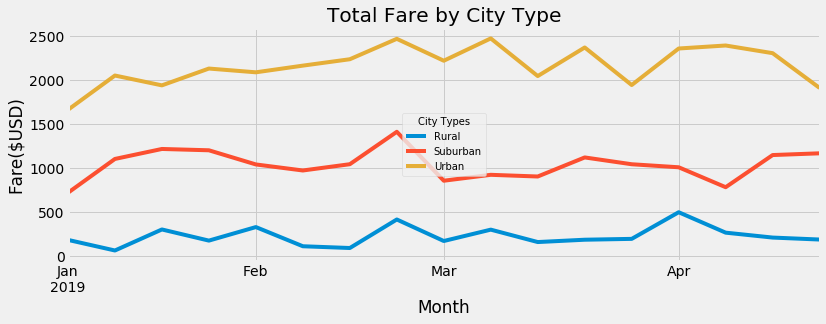

In [18]:
# Plotting final results
#Graph Style
style.use('fivethirtyeight')
pyber_data_plot = pyber_data_dates_resample.plot(figsize = (12,4))
#Titles
plt.title('Total Fare by City Type')
plt.xlabel('Month')
plt.ylabel('Fare($USD)')
#plt.xlim('Jan','May')
lgnd = plt.legend(fontsize="10", mode="Expanded", scatterpoints=1, loc="center", title="City Types", labels = ['Rural','Suburban','Urban'])
lgnd.get_title().set_fontsize(10)
plt.savefig('analysis/challenge5.png', bbox_inches='tight')